In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,RFE
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [175]:
raw = ['has_photo','has_video','emoji_count','has_question','has_exclaim','like_count','share_count','repost_count','reply_count','sentiment_score','lang','viral']

In [176]:
df = pd.read_csv('training_data.csv')
df = df[raw]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   has_photo        1519 non-null   bool   
 1   has_video        1519 non-null   bool   
 2   emoji_count      1519 non-null   int64  
 3   has_question     1519 non-null   bool   
 4   has_exclaim      1519 non-null   bool   
 5   like_count       1519 non-null   int64  
 6   share_count      1519 non-null   int64  
 7   repost_count     1519 non-null   int64  
 8   reply_count      1519 non-null   int64  
 9   sentiment_score  1519 non-null   float64
 10  lang             1519 non-null   object 
 11  viral            1519 non-null   int64  
dtypes: bool(4), float64(1), int64(6), object(1)
memory usage: 101.0+ KB


In [177]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df)

There are no missing values in the dataset.


In [178]:
df.fillna(0, inplace=True)

In [179]:
df.isnull().sum()

has_photo          0
has_video          0
emoji_count        0
has_question       0
has_exclaim        0
like_count         0
share_count        0
repost_count       0
reply_count        0
sentiment_score    0
lang               0
viral              0
dtype: int64

In [180]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(),
                      100 * df[col].isna().sum() / len(df[col]),
                      df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,has_photo,bool,0,0.0,2,"[False, True]"
1,has_video,bool,0,0.0,2,"[False, True]"
2,emoji_count,int64,0,0.0,14,"[0, 3, 2, 4, 6, 1, 5, 10, 7, 12, 13, 23, 14, 11]"
3,has_question,bool,0,0.0,2,"[False, True]"
4,has_exclaim,bool,0,0.0,2,"[False, True]"
5,like_count,int64,0,0.0,290,"[0, 1, 17000, 3, 9, 5, 2, 13, 113, 33, 90, 10,..."
6,share_count,int64,0,0.0,97,"[0, 6655, 1, 13, 3, 145, 5, 9, 47, 2, 42, 23, ..."
7,repost_count,int64,0,0.0,103,"[0, 550, 1, 37, 81, 20, 280, 2, 3, 4, 86, 77, ..."
8,reply_count,int64,0,0.0,81,"[0, 440, 2, 5, 10, 1, 50, 3, 14, 29, 7, 28, 17..."
9,sentiment_score,float64,0,0.0,1485,"[0.6993615627288818, 0.9048394560813904, 0.648..."


**test data**

In [181]:
df_test = pd.read_csv('test_data.csv')
df_test = df_test[raw]
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   has_photo        1519 non-null   bool   
 1   has_video        1519 non-null   bool   
 2   emoji_count      1519 non-null   int64  
 3   has_question     1519 non-null   bool   
 4   has_exclaim      1519 non-null   bool   
 5   like_count       1519 non-null   int64  
 6   share_count      1519 non-null   int64  
 7   repost_count     1519 non-null   int64  
 8   reply_count      1519 non-null   int64  
 9   sentiment_score  1519 non-null   float64
 10  lang             1519 non-null   object 
 11  viral            1519 non-null   int64  
dtypes: bool(4), float64(1), int64(6), object(1)
memory usage: 101.0+ KB


In [182]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df_test)

There are no missing values in the dataset.


In [183]:
df_test.isnull().sum()

has_photo          0
has_video          0
emoji_count        0
has_question       0
has_exclaim        0
like_count         0
share_count        0
repost_count       0
reply_count        0
sentiment_score    0
lang               0
viral              0
dtype: int64

In [184]:
list_item = []
for col in df_test.columns:
    list_item.append([col, df_test[col].dtype, df_test[col].isna().sum(),
                      100 * df_test[col].isna().sum() / len(df_test[col]),
                      df_test[col].nunique(), df_test[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,has_photo,bool,0,0.0,2,"[False, True]"
1,has_video,bool,0,0.0,2,"[False, True]"
2,emoji_count,int64,0,0.0,13,"[0, 2, 1, 3, 8, 6, 5, 4, 7, 10, 9, 12, 19]"
3,has_question,bool,0,0.0,2,"[False, True]"
4,has_exclaim,bool,0,0.0,2,"[False, True]"
5,like_count,int64,0,0.0,285,"[4, 137, 175, 3, 0, 10000, 13, 8, 27, 7, 2, 52..."
6,share_count,int64,0,0.0,91,"[0, 9, 277, 2, 1, 3, 64, 26, 40, 8, 27, 4, 5, ..."
7,repost_count,int64,0,0.0,102,"[0, 2, 8, 1277, 1, 9, 7, 5, 128, 19, 14, 168, ..."
8,reply_count,int64,0,0.0,80,"[0, 4, 526, 67, 2, 1, 3, 32, 6, 9, 16, 51, 7, ..."
9,sentiment_score,float64,0,0.0,1489,"[0.6759315133094788, 0.5088005065917969, 0.5, ..."


**Baseline Model **

In [185]:
for col in df.select_dtypes(include=['bool', 'category','object']):
     df[col] = LabelEncoder().fit_transform(df[col])

for col in df_test.select_dtypes(include=['bool', 'category','object']):
     df_test[col] = LabelEncoder().fit_transform(df_test[col])
    
X_train = df.drop(columns = ['viral'])
y_train = df['viral']

X_test = df_test.drop(columns=['viral'])
y_test = df_test['viral']

In [186]:
y_train.value_counts()

viral
0    749
1    593
2    177
Name: count, dtype: int64

In [187]:
#handle imbalance
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)
y_train.value_counts()

viral
0    749
1    749
2    749
Name: count, dtype: int64


📊 Model: Random Forest
🎯 Weighted F1 Score: 0.5979
              precision    recall  f1-score   support

           0      0.679     0.663     0.671       745
           1      0.516     0.495     0.505       604
           2      0.550     0.682     0.609       170

    accuracy                          0.598      1519
   macro avg      0.581     0.613     0.595      1519
weighted avg      0.599     0.598     0.598      1519



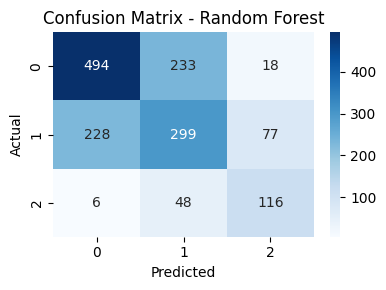


📊 Model: Logistic Regression
🎯 Weighted F1 Score: 0.6482
              precision    recall  f1-score   support

           0      0.664     0.882     0.758       745
           1      0.647     0.416     0.506       604
           2      0.739     0.618     0.673       170

    accuracy                          0.667      1519
   macro avg      0.684     0.638     0.646      1519
weighted avg      0.666     0.667     0.648      1519



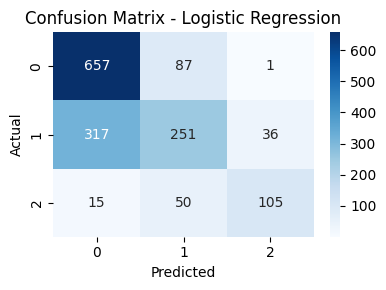


📊 Model: SVM
🎯 Weighted F1 Score: 0.4375
              precision    recall  f1-score   support

           0      0.542     0.999     0.703       745
           1      0.650     0.022     0.042       604
           2      0.802     0.594     0.682       170

    accuracy                          0.565      1519
   macro avg      0.664     0.538     0.476      1519
weighted avg      0.614     0.565     0.438      1519



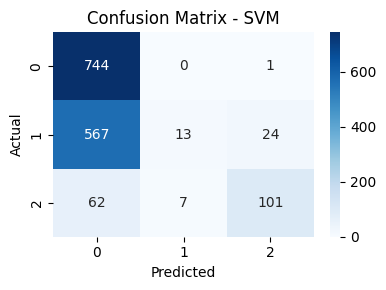


📊 Model: XGBoost
🎯 Weighted F1 Score: 0.6214
              precision    recall  f1-score   support

           0      0.699     0.679     0.689       745
           1      0.541     0.528     0.534       604
           2      0.580     0.700     0.635       170

    accuracy                          0.621      1519
   macro avg      0.607     0.636     0.619      1519
weighted avg      0.623     0.621     0.621      1519



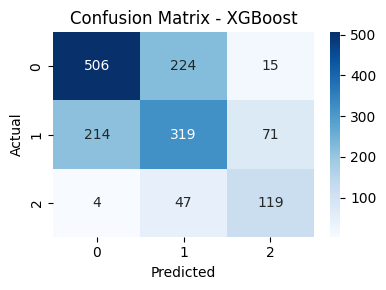


📊 Model: Naive Bayes
🎯 Weighted F1 Score: 0.5442
              precision    recall  f1-score   support

           0      0.582     0.983     0.731       745
           1      0.716     0.167     0.271       604
           2      0.835     0.594     0.694       170

    accuracy                          0.615      1519
   macro avg      0.711     0.581     0.566      1519
weighted avg      0.664     0.615     0.544      1519



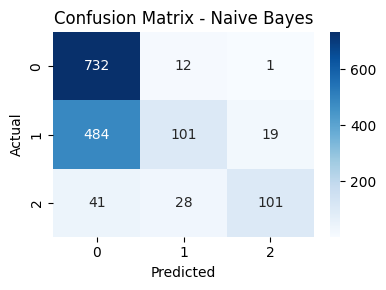

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



# Define models
models = {
    "Random Forest": RandomForestClassifier( random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC( probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False,  random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use weighted F1
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n📊 Model: {name}")
    print(f"🎯 Weighted F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred, digits=3))  

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
